In [1]:
demo_nb = 0

# Démo selon le code du prof

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import time

from bc.dataset import Frames, Actions, Scalars

In [3]:
dataset_path = 'storage/demos'
frames = Frames(dataset_path, channels='rgbd')
actions = Actions(dataset_path, action_space='tool', dim_action=4)
scalars = actions._scalars

In [4]:
len(frames), len(actions)

(1154, 1154)

In [5]:
idxs_demo = frames.keys.get_demo(demo_nb)
frames_demo = frames[idxs_demo]
actions_demo = actions[idxs_demo]
scalars_demo = scalars[idxs_demo]

<IPython.core.display.Javascript object>


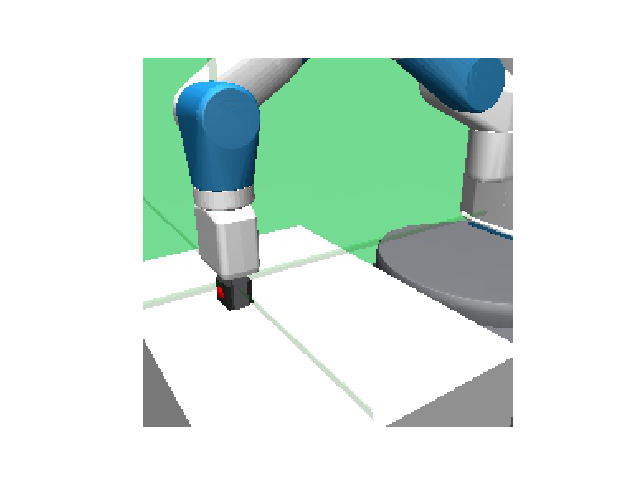

In [6]:
fig, ax = plt.subplots()
ax.axis('off')

for i in tqdm(range(len(frames_demo))):
    obs_im = frames_demo[i]['rgb']
    ax.imshow(obs_im, cmap='gray')
    fig.canvas.draw()
    time.sleep(0.01)

<IPython.core.display.Javascript object>


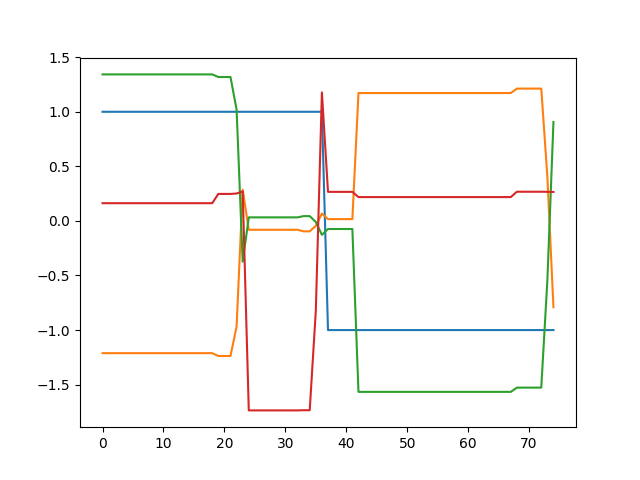

In [7]:
plt.figure()
plt.plot(actions_demo)

# Démo selon notre code

<IPython.core.display.Javascript object>


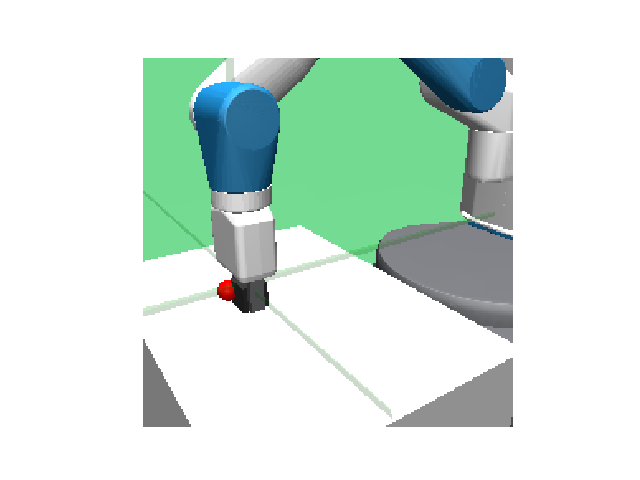

In [8]:
import utils
import matplotlib.pyplot as plt
import time

env = utils.make_env(demo_nb)
expert = utils.PickPlaceExpert(env.dt)

obs = env.reset()
expert.reset(obs['cube_pos'], obs['goal_pos'])
success = False
action = False

fig, ax = plt.subplots()
ax.axis('off')
actions = []

while not success:
    action = expert.act(obs)
    actions.append(action)
    obs, _, _, info = env.step(action)
    success = info['is_success'] > 0.99

    ax.imshow(obs['rgb'], cmap='gray')
    fig.canvas.draw()
    time.sleep(0.01)

<IPython.core.display.Javascript object>


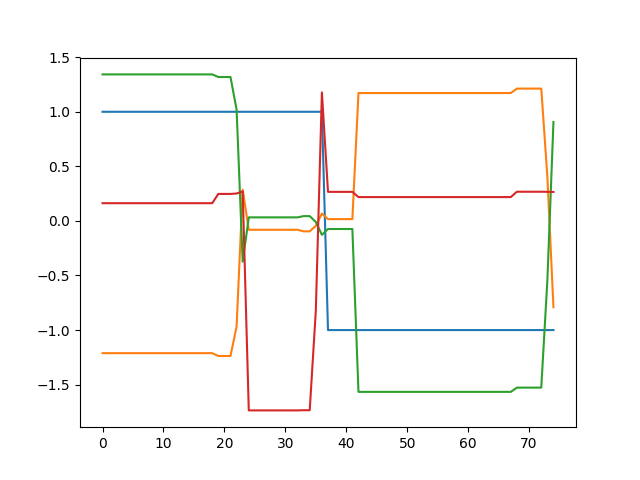

In [9]:
plt.figure()
plt.plot(actions_demo)